/var/folders/f2/szdn4h555wv3xkj5npgb1nqc0000gn/T/ipykernel_4109/3500369035.py:54: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


KeyboardInterrupt: 

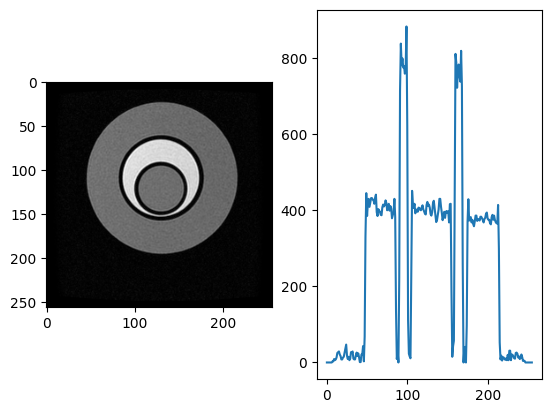

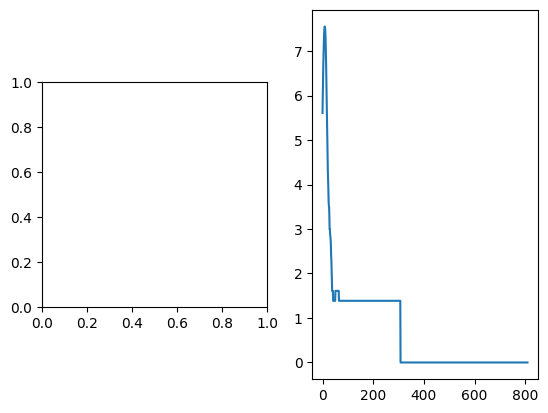

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Mon Sep 16 15:11:20 2024

@author: alejandro
"""

import numpy as np
import matplotlib.pyplot as plt
import cv2
import pydicom
from scipy.ndimage import label
import time

# read file
db = pydicom.dcmread('../data/phantom.dcm')
image = db.pixel_array

fig, ax = plt.subplots(1, 2)
ax[0].imshow(image, cmap = 'gray')
ax[1].plot(image[np.round(db.Rows/2).astype(int),:])

# simplified MSER algorithm
pixel_list= np.sort(image.reshape(-1,1))
tmp = np.zeros_like(image)

G = np.unique(pixel_list)

n_labels = np.zeros_like(G)
labels = np.zeros((len(G), *image.shape))
fig, ax = plt.subplots(1,2)
for g in range(len(G)):
    ax[0].cla()
    ax[1].cla()
    idx = np.where(image == G[g])
    tmp[idx] = 1
    l, num = label(tmp, structure=np.ones((3, 3))) 
    labels[g] = l
    n_labels[g] = num
    
    ax[0].imshow(l)
    ax[1].plot(np.arange(len(G)), np.log(n_labels +1))
    # drawing updated values
    fig.canvas.draw()
    
    # This will run the GUI event
    # loop until all UI events
    # currently waiting have been processed
    fig.canvas.flush_events()

    time.sleep(0.001)
    
    # show the figure
    fig.show()
    
# follow background area
# fig, ax = plt.subplots()
maps = np.zeros((len(G), *image.shape))
areaBK = np.zeros(len(G))

for g in range(len(G)):
    current_lab = np.squeeze(labels[g,:,:])
    area = np.zeros(n_labels[g])
    for n in range(n_labels[g]):
        idx = np.where(current_lab == (n+1))
        area[n] = len(idx[0])
    idmax = np.argmax(area)
    id1 = np.where(current_lab == (idmax+1))
    areaBK[g] = len(id1[0])
    maps[g][idx] = 255
    
    # ax.imshow(np.squeeze(maps[g,:,:]))
    # # drawing updated values
    # fig.canvas.draw()
    # fig.canvas.flush_events()
    # time.sleep(0.001)
    
    # fig.show()
    
fig, ax = plt.subplots(1, 2)
ax[0].plot(areaBK)
variazione = 50*np.diff(areaBK)
ax[1].plot(variazione)

idx = np.where(variazione == 0)


mser = cv2.MSER_create()
regionsc= mser.detectRegions(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
display()